In [1]:
import h5py
from dataloader import DataSet
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from glob import glob
from osgeo import gdal

In [2]:
fnames= sorted(glob('/home/allen/drive/geotiff/20170604/*.tif'))

In [3]:
N_FOERCAST=10
n_splits= len(fnames)//N_FOERCAST
sample_splits= [fnames[i*N_FOERCAST:(i+1)*N_FOERCAST] for i in range(n_splits)]
sample_splits

[['/home/allen/drive/geotiff/20170604/PrecipRate_00.00_20170603-120800.grib2-var0-z0.tif',
  '/home/allen/drive/geotiff/20170604/PrecipRate_00.00_20170603-121000.grib2-var0-z0.tif',
  '/home/allen/drive/geotiff/20170604/PrecipRate_00.00_20170603-121200.grib2-var0-z0.tif',
  '/home/allen/drive/geotiff/20170604/PrecipRate_00.00_20170603-121400.grib2-var0-z0.tif',
  '/home/allen/drive/geotiff/20170604/PrecipRate_00.00_20170603-121600.grib2-var0-z0.tif',
  '/home/allen/drive/geotiff/20170604/PrecipRate_00.00_20170603-121800.grib2-var0-z0.tif',
  '/home/allen/drive/geotiff/20170604/PrecipRate_00.00_20170603-122000.grib2-var0-z0.tif',
  '/home/allen/drive/geotiff/20170604/PrecipRate_00.00_20170603-122200.grib2-var0-z0.tif',
  '/home/allen/drive/geotiff/20170604/PrecipRate_00.00_20170603-122400.grib2-var0-z0.tif',
  '/home/allen/drive/geotiff/20170604/PrecipRate_00.00_20170603-122600.grib2-var0-z0.tif'],
 ['/home/allen/drive/geotiff/20170604/PrecipRate_00.00_20170603-122800.grib2-var0-z0.tif'

In [2]:
before, after=DataSet(event='20170604')[19]

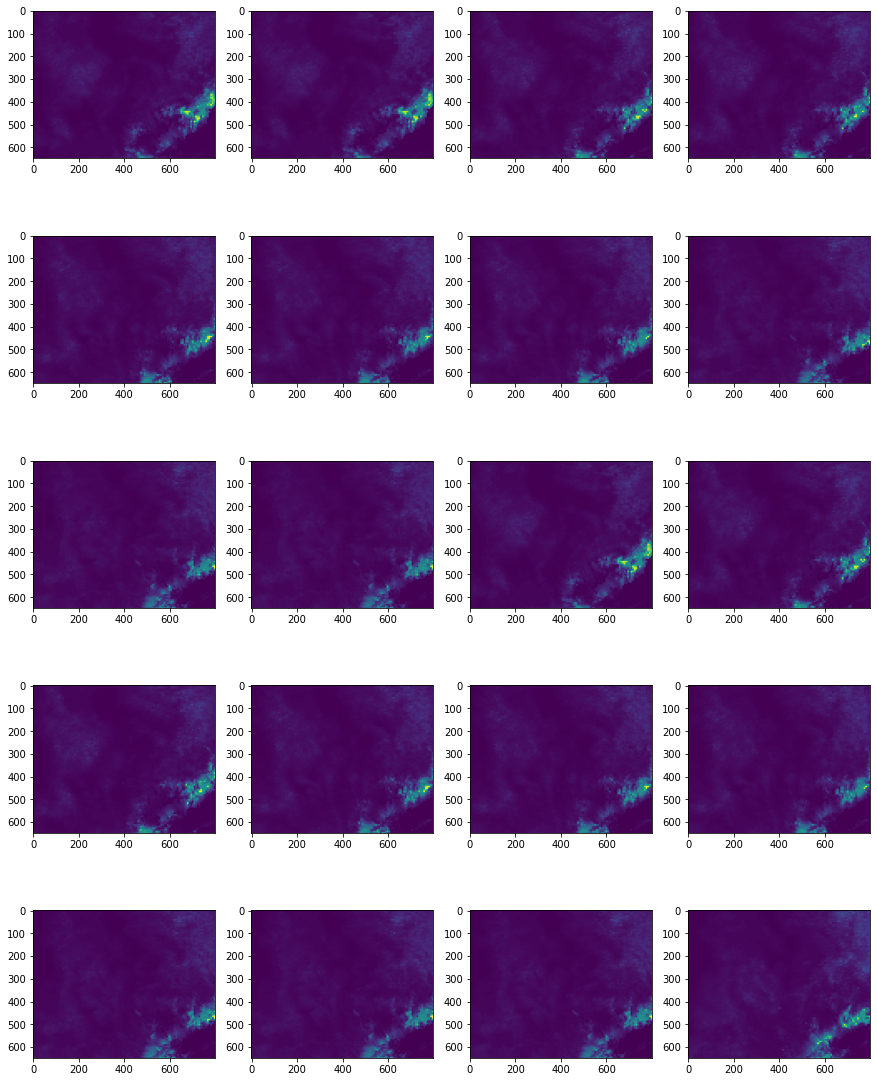

In [3]:
fig=plt.figure(figsize=(15,20))
for i in range(20):
    ax= fig.add_subplot(5,4,i+1)
    if i<10:
        ax.imshow(before[i,:,:,:].numpy().squeeze())
    if i>=10:
        ax.imshow(after[i-10,:,:,:].numpy().squeeze())

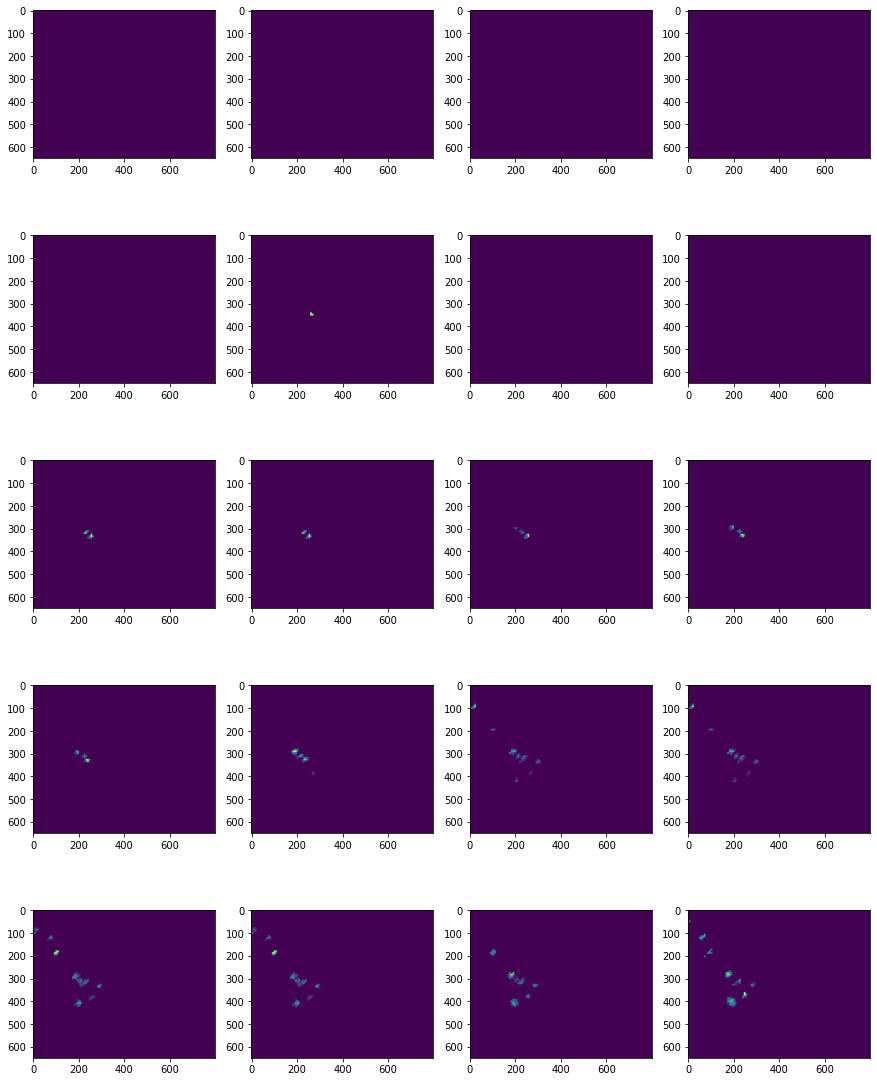

In [32]:
fig=plt.figure(figsize=(15,20))
for i in range(20):
    ax= fig.add_subplot(5,4,i+1)
    if i<10:
        arr= gdal.Open(sample_splits[0][i]).ReadAsArray()
        ax.imshow(arr)
    if i>=10:
        arr= gdal.Open(sample_splits[1][i-10]).ReadAsArray()
        ax.imshow(arr)

In [5]:
def normalizer(x):
	'''input tensor size (b,tsize,c,m,n), Apply log transform to data
		See Casper et al. 2020 MetNet
	'''
	log_transform= torch.log10(x+0.01)/4
	tangent_transform= torch.tanh(log_transform)

	return tangent_transform 

In [6]:
before= normalizer(before)

In [7]:
from model import RadarNet, Nowcast

In [13]:
before.size()

torch.Size([10, 1, 648, 800])